In [14]:
import numpy as np
import dispersion
from scipy import constants as C
import matplotlib.pyplot as plt

w = np.linspace(2.0*np.pi*C.c/0.35e-6,2.0*np.pi*C.c/0.65e-6,100)
print(w.shape)
#chi = dispersion.LiquidWater.chi(w)
#plt.plot(w,chi)

(100,)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

def disp_frame(frame):

    amp = np.load('out/amp'+str(frame)+'.npy')
    a_normalized = amp/np.max(np.abs(amp))
    phase = np.angle(amp)
    phase[np.where(np.abs(a_normalized)<.01)]=0
    
    fig_num = 0
    fig_num += 1
    plt.figure(fig_num,figsize=(6,7))

    plt.subplot(211)
    #plt.imshow(amp,origin='lower',cmap='jet',aspect='auto')
    plt.imshow(np.abs(amp)**2,origin='lower',cmap='jet',aspect='auto',extent=[-1,1,0,1])
    b=plt.colorbar()
    b.set_label(r'$|a|^2$',size=18)
    plt.xlabel(r'$\tau$',size=18)
    plt.ylabel(r'$\rho$',size=18)

    plt.subplot(212)
    plt.imshow(phase,origin='lower',cmap='jet',aspect='auto',extent=[-1,1,0,1])
    b=plt.colorbar()
    b.set_label(r'$\psi$',size=18)
    plt.xlabel(r'$\tau$',size=18)
    plt.ylabel(r'$\rho$',size=18)

    plt.tight_layout()
    
    fig_num += 1
    plt.figure(fig_num)
    plt.plot(np.abs(amp[0,:])**2)
    plt.xlabel(r'$\tau$',size=18)
    plt.ylabel(r'$|a|^2$',size=18)


    plt.show()

ipywidgets.interact(disp_frame,frame=ipywidgets.IntSlider(min=0,max=19,step=1,value=0));

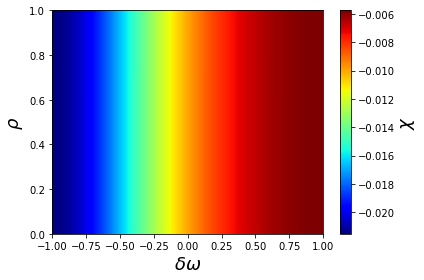

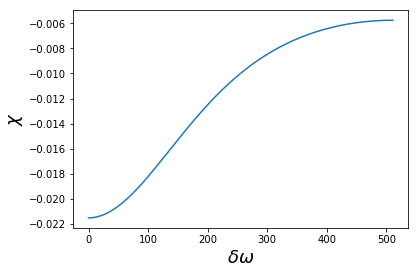

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

chiw0 = np.load('out/chiw0.npy')
chiw = np.load('out/chiw.npy')
chiw += np.outer(np.ones(chiw.shape[0]),chiw0)
chiw = np.roll(chiw,np.int(chiw.shape[1]/2)-1,axis=1)

fig_num = 0
fig_num += 1
plt.figure(fig_num,figsize=(6,4))

plt.imshow(chiw,origin='lower',cmap='jet',aspect='auto',extent=[-1,1,0,1])
b=plt.colorbar()
b.set_label(r'$\chi$',size=18)
plt.xlabel(r'$\delta\omega$',size=18)
plt.ylabel(r'$\rho$',size=18)

plt.tight_layout()

fig_num += 1
plt.figure(fig_num,figsize=(6,4))
plt.plot(chiw[0,:])
plt.xlabel(r'$\delta\omega$',size=18)
plt.ylabel(r'$\chi$',size=18)


plt.show()